In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

In [3]:
num_cols = train._get_numeric_data().columns 

In [4]:
len(num_cols)

11

In [5]:
train.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,AIX000345001,DST000401,NO,0.0,1.4,0.5,2015-04-20 04:18:25,2015-04-20 04:24:20,1,-74.003939,40.742894,1,N,-73.993369,40.734247,CRD,0.5,8.4
1,AIX000345002,DST000401,NO,0.0,1.0,0.5,2015-04-19 18:16:07,2015-04-19 18:22:06,3,-73.973864,40.752194,1,N,-73.958701,40.772533,CRD,0.0,8.5
2,AIX000345003,DST000401,NO,0.0,0.0,0.5,2015-04-06 08:04:32,2015-04-06 08:10:05,2,-73.954406,40.764420,1,N,-73.970780,40.758350,CSH,0.0,7.0
3,AIX000345004,DST000532,NO,0.0,1.8,0.5,2015-04-10 09:48:00,2015-04-10 10:00:00,2,-73.962345,40.767215,1,NaN,-73.975512,40.756867,CRD,0.0,11.3
4,AIX000345005,DST000401,NO,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,N,-73.999369,40.721517,CSH,0.0,10.0


In [6]:
list1 = ['TID','vendor_id' , 'fare_amount']
num_cols = list(set(num_cols) - set(list1))

In [7]:
len(num_cols)

10

In [8]:
df = train[num_cols] 

In [9]:
corr = df.corr()

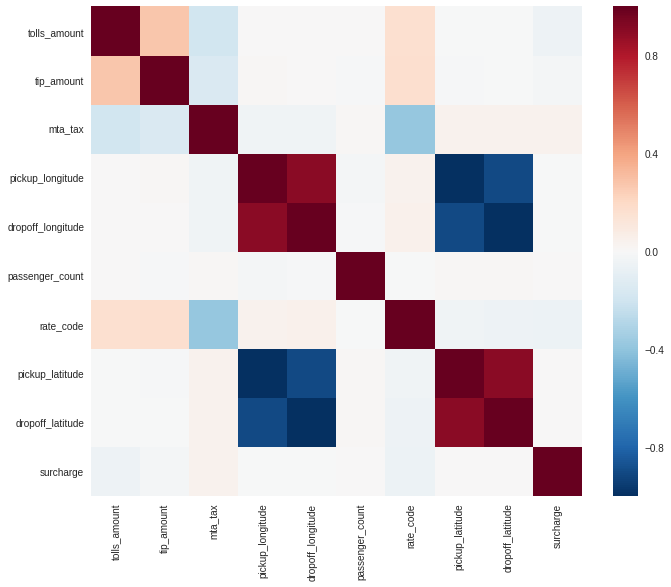

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,xticklabels=num_cols, yticklabels=num_cols , ax=ax)

In [11]:
tid = test['TID']

In [12]:
train = train.drop(['TID'],axis = 1)

In [13]:
test = test.drop(['TID'],1)

In [14]:
train.isnull().sum()

vendor_id                  0
new_user                  19
tolls_amount               0
tip_amount            165196
mta_tax                    0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
pickup_longitude       49809
pickup_latitude        33101
rate_code                  0
store_and_fwd_flag    648122
dropoff_longitude       4987
dropoff_latitude        8162
payment_type               0
surcharge              99173
fare_amount                0
dtype: int64

In [15]:
num_cols

['tolls_amount',
 'tip_amount',
 'mta_tax',
 'pickup_longitude',
 'dropoff_longitude',
 'passenger_count',
 'rate_code',
 'pickup_latitude',
 'dropoff_latitude',
 'surcharge']

In [16]:
train['pickup_latitude'].fillna(0.0,inplace=True)
train['pickup_longitude'].fillna(0.0,inplace=True)
train['dropoff_latitude'].fillna(0.0,inplace=True)
train['dropoff_longitude'].fillna(0.0,inplace=True)

test['pickup_latitude'].fillna(0.0,inplace=True)
test['pickup_longitude'].fillna(0.0,inplace=True)
test['dropoff_latitude'].fillna(0.0,inplace=True)
test['dropoff_longitude'].fillna(0.0,inplace=True)

In [17]:
for i in num_cols:
    train[i].fillna(train[i].median(),inplace=True)
    test[i].fillna(test[i].median(),inplace=True)

In [18]:
train.isnull().sum()

vendor_id                  0
new_user                  19
tolls_amount               0
tip_amount                 0
mta_tax                    0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
pickup_longitude           0
pickup_latitude            0
rate_code                  0
store_and_fwd_flag    648122
dropoff_longitude          0
dropoff_latitude           0
payment_type               0
surcharge                  0
fare_amount                0
dtype: int64

In [19]:
train['new_user'].value_counts()/train.shape[0]

NO     0.999890
YES    0.000098
Name: new_user, dtype: float64

In [20]:
train['store_and_fwd_flag'].value_counts()/train.shape[0]

N    0.599437
Y    0.009680
Name: store_and_fwd_flag, dtype: float64

In [21]:
print train.shape

print test.shape

(1658099, 17)
(509808, 16)


In [22]:
train.head()

,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,DST000401,NO,0.0,1.4,0.5,2015-04-20 04:18:25,2015-04-20 04:24:20,1,-74.003939,40.742894,1,N,-73.993369,40.734247,CRD,0.5,8.4
1,DST000401,NO,0.0,1.0,0.5,2015-04-19 18:16:07,2015-04-19 18:22:06,3,-73.973864,40.752194,1,N,-73.958701,40.772533,CRD,0.0,8.5
2,DST000401,NO,0.0,0.0,0.5,2015-04-06 08:04:32,2015-04-06 08:10:05,2,-73.954406,40.764420,1,N,-73.970780,40.758350,CSH,0.0,7.0
3,DST000532,NO,0.0,1.8,0.5,2015-04-10 09:48:00,2015-04-10 10:00:00,2,-73.962345,40.767215,1,NaN,-73.975512,40.756867,CRD,0.0,11.3
4,DST000401,NO,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,N,-73.999369,40.721517,CSH,0.0,10.0


In [23]:
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'])
test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'])

In [24]:
train['day']= train['pickup_datetime'].dt.day

train['month'] = train['pickup_datetime'].dt.month

train['year'] = train['pickup_datetime'].dt.year

train['weekday'] = train['pickup_datetime'].dt.dayofweek   

train['hour'] = train['pickup_datetime'].dt.hour



In [25]:
test['day']= test['pickup_datetime'].dt.day

test['month'] = test['pickup_datetime'].dt.month

test['year'] = test['pickup_datetime'].dt.year

test['weekday'] = test['pickup_datetime'].dt.dayofweek

test['hour'] = test['pickup_datetime'].dt.hour

In [26]:
train['dropoff_datetime']=pd.to_datetime(train['dropoff_datetime'])
test['dropoff_datetime']=pd.to_datetime(test['dropoff_datetime'])

In [27]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [28]:
km1 = haversine_np(train['pickup_longitude'],train['pickup_latitude'],train['dropoff_longitude'],train['dropoff_latitude'])
km = haversine_np(test['pickup_longitude'],test['pickup_latitude'],test['dropoff_longitude'],test['dropoff_latitude'])

In [29]:
train['dist_diff'] = km1

In [30]:
test['dist_diff'] = km

In [31]:
train['time_dist'] = (train['dropoff_datetime']-train['pickup_datetime']).astype('timedelta64[m]') 
test['time_dist'] = (test['dropoff_datetime']-test['pickup_datetime']).astype('timedelta64[m]') 

In [32]:
print train.shape  

print train.dtypes

(1658099, 24)
vendor_id                     object
new_user                      object
tolls_amount                 float64
tip_amount                   float64
mta_tax                      float64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
rate_code                      int64
store_and_fwd_flag            object
dropoff_longitude            float64
dropoff_latitude             float64
payment_type                  object
surcharge                    float64
fare_amount                  float64
day                            int64
month                          int64
year                           int64
weekday                        int64
hour                           int64
dist_diff                    float64
time_dist                    float64
dtype: object


In [33]:
test.shape

(509808, 23)

In [34]:
train.dtypes

vendor_id                     object
new_user                      object
tolls_amount                 float64
tip_amount                   float64
mta_tax                      float64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
rate_code                      int64
store_and_fwd_flag            object
dropoff_longitude            float64
dropoff_latitude             float64
payment_type                  object
surcharge                    float64
fare_amount                  float64
day                            int64
month                          int64
year                           int64
weekday                        int64
hour                           int64
dist_diff                    float64
time_dist                    float64
dtype: object

In [35]:
obj_list = ['new_user' , 'store_and_fwd_flag' , 'pickup_datetime' , 'dropoff_datetime'] 

train = train.drop(obj_list , 1) 
test = test.drop(obj_list , 1)

In [36]:
test.dtypes

vendor_id             object
tolls_amount         float64
tip_amount           float64
mta_tax              float64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
rate_code              int64
dropoff_longitude    float64
dropoff_latitude     float64
payment_type          object
surcharge            float64
day                    int64
month                  int64
year                   int64
weekday                int64
hour                   int64
dist_diff            float64
time_dist            float64
dtype: object

In [37]:
cat = ['vendor_id' , 'payment_type']
other_df = pd.get_dummies(train[cat])
other_df_test = pd.get_dummies(test[cat])

In [38]:
other_df.shape

(1658099, 9)

In [39]:
cols = train.columns

In [40]:
num = list(set(cols) - set(cat))

In [41]:
train.shape

(1658099, 20)

In [42]:
number_df = train[num]

In [43]:
number_df.shape

(1658099, 18)

In [44]:
train = pd.concat([other_df,number_df],axis=1)

In [45]:
train.shape

(1658099, 27)

In [46]:
cols = test.columns 
nums = list(set(cols) - set(cat))

In [47]:
print test.shape

print len(nums)

(509808, 19)
17


In [48]:
number_df = test[nums] 

test = pd.concat([other_df_test,number_df],axis=1)

In [49]:
print test.shape
print test.dtypes

(509808, 24)
vendor_id_DST000481      uint8
vendor_id_DST000543      uint8
payment_type_CRD         uint8
payment_type_CSH         uint8
payment_type_DIS         uint8
payment_type_NOC         uint8
payment_type_UNK         uint8
tolls_amount           float64
dropoff_latitude       float64
tip_amount             float64
hour                     int64
mta_tax                float64
time_dist              float64
pickup_longitude       float64
month                    int64
dropoff_longitude      float64
passenger_count          int64
weekday                  int64
year                     int64
rate_code                int64
pickup_latitude        float64
day                      int64
dist_diff              float64
surcharge              float64
dtype: object


In [50]:
validate=train[train.year > 2015]
training=train[train.year <= 2015]

In [51]:
validate.shape

(515899, 27)

In [52]:
training.shape

(1142200, 27)

In [53]:
preds = test.columns
target = 'fare_amount'

In [54]:
X_training=training[preds].values
y_training=training[target].values

X_validate=validate[preds].values
y_validate=validate[target].values

In [55]:
import xgboost as xgb

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
dtrain_all = xgb.DMatrix(train[preds],train[target], feature_names=preds)
dtrain = xgb.DMatrix(X_training, y_training, feature_names=preds)
dval = xgb.DMatrix(X_validate, y_validate, feature_names=preds)
dtest = xgb.DMatrix(test[preds], feature_names=preds)

In [57]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 7,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'min_child_weight':1,
    'silent': 1,
    'seed':2017, 
    'nthread':4
}


In [65]:
training.dtypes

vendor_id_DST000401      uint8
vendor_id_DST000481      uint8
vendor_id_DST000532      uint8
vendor_id_DST000543      uint8
payment_type_CRD         uint8
payment_type_CSH         uint8
payment_type_DIS         uint8
payment_type_NOC         uint8
payment_type_UNK         uint8
tolls_amount           float64
dropoff_latitude       float64
tip_amount             float64
hour                     int64
mta_tax                float64
time_dist              float64
fare_amount            float64
pickup_longitude       float64
month                    int64
dropoff_longitude      float64
passenger_count          int64
weekday                  int64
year                     int64
rate_code                int64
pickup_latitude        float64
day                      int64
dist_diff              float64
surcharge              float64
dtype: object

In [70]:
watchlist = [ (dtrain,'Train'), (dval, 'Validation') ]
num_rounds = 2000 # Increase the number of rounds while running in local
model = xgb.train(xgb_params, dtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=5)

[0]	Train-mae:13.261	Validation-mae:13.5079
Multiple eval metrics have been passed: 'Validation-mae' will be used for early stopping.

Will train until Validation-mae hasn't improved in 50 rounds.
[5]	Train-mae:7.85998	Validation-mae:8.12359
[10]	Train-mae:4.71725	Validation-mae:4.99557
[15]	Train-mae:2.89476	Validation-mae:3.1632
[20]	Train-mae:1.8903	Validation-mae:2.12182
[25]	Train-mae:1.35331	Validation-mae:1.54735
[30]	Train-mae:1.11097	Validation-mae:1.26024
[35]	Train-mae:1.00149	Validation-mae:1.1213
[40]	Train-mae:0.955277	Validation-mae:1.05136
[45]	Train-mae:0.930926	Validation-mae:1.01579
[50]	Train-mae:0.913792	Validation-mae:0.992875
[55]	Train-mae:0.902175	Validation-mae:0.978676
[60]	Train-mae:0.895517	Validation-mae:0.971098
[65]	Train-mae:0.886861	Validation-mae:0.96213
[70]	Train-mae:0.883109	Validation-mae:0.959788
[75]	Train-mae:0.876817	Validation-mae:0.95383
[80]	Train-mae:0.874029	Validation-mae:0.951562
[85]	Train-mae:0.870994	Validation-mae:0.950329
[90]	Trai

[830]	Train-mae:0.688115	Validation-mae:0.873542
[835]	Train-mae:0.687627	Validation-mae:0.873096
[840]	Train-mae:0.687019	Validation-mae:0.87309
[845]	Train-mae:0.68678	Validation-mae:0.873176
[850]	Train-mae:0.685741	Validation-mae:0.872712
[855]	Train-mae:0.685418	Validation-mae:0.872639
[860]	Train-mae:0.684917	Validation-mae:0.872468
[865]	Train-mae:0.684292	Validation-mae:0.872685
[870]	Train-mae:0.683581	Validation-mae:0.872347
[875]	Train-mae:0.683253	Validation-mae:0.872423
[880]	Train-mae:0.682754	Validation-mae:0.872378
[885]	Train-mae:0.682091	Validation-mae:0.872625
[890]	Train-mae:0.68174	Validation-mae:0.872616
[895]	Train-mae:0.681115	Validation-mae:0.872622
[900]	Train-mae:0.680795	Validation-mae:0.872514
[905]	Train-mae:0.680267	Validation-mae:0.872451
[910]	Train-mae:0.679913	Validation-mae:0.872622
[915]	Train-mae:0.679521	Validation-mae:0.872217
[920]	Train-mae:0.678875	Validation-mae:0.872036
[925]	Train-mae:0.677672	Validation-mae:0.871281
[930]	Train-mae:0.67713

In [72]:
model = xgb.train(dict(xgb_params, silent=1), dtrain_all, num_boost_round=1194)

In [73]:
predict = model.predict(dtest)

In [74]:
sub = pd.read_csv('sample_submission.csv')

In [75]:
sub.shape

(509808, 2)

In [76]:
sub.head()

,TID,fare_amount
0,AJX000119871,
1,AJX000119872,
2,AJX000119873,
3,AJX000119874,
4,AJX000119875,


In [77]:
sub['TID'] = tid

In [78]:
sub['fare_amount'] = predict

In [79]:
sub.to_csv('sub1.csv',index=False)